In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

df = pd.read_csv("C:/Users/Swetha/Downloads/Salary_Data.csv")

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [7]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

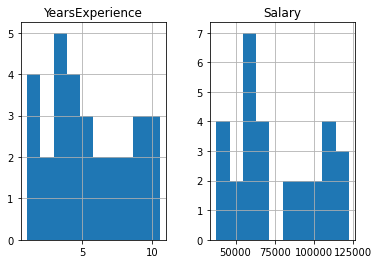

In [8]:
df.hist()

C:\Users\Swetha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


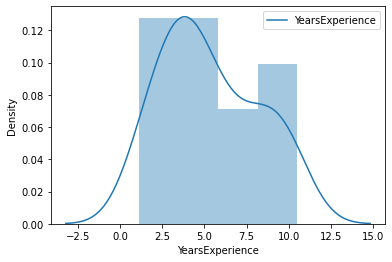

In [10]:
sns.distplot(df["YearsExperience"])
plt.legend(['YearsExperience'])

C:\Users\Swetha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

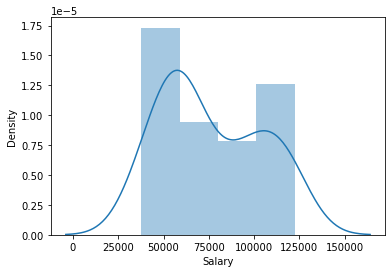

In [11]:
sns.distplot(df['Salary'])

C:\Users\Swetha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

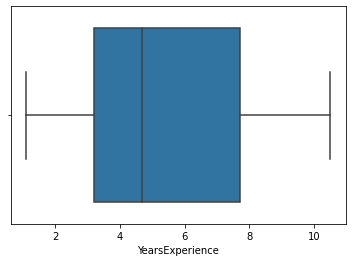

In [12]:
sns.boxplot(df['YearsExperience'])

C:\Users\Swetha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

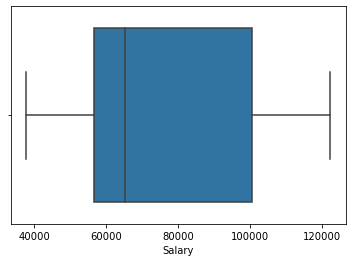

In [13]:
sns.boxplot(df['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

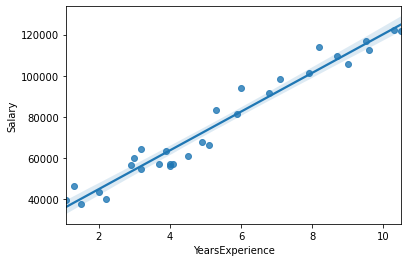

In [14]:
sns.regplot(x = 'YearsExperience', y = 'Salary', data = df)

In [15]:
model_1 = smf.ols('Salary ~ YearsExperience' , data = df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           1.14e-20
Time:                        15:47:33   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
pred_data = model_1.predict(df['YearsExperience'])
from ml_metrics import mse
rmse_1 = np.sqrt(mse(df['Salary'], pred_data))
print("RSME of first model is:", rmse_1)

RSME of first model is: 5592.043608760662


In [22]:
model_1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [23]:
model_1.tvalues, model_1.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [24]:
model_1.rsquared, model_1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [30]:
from sklearn.preprocessing import StandardScaler
array_df = df.values
standard_df = StandardScaler().fit(array_df).transform(array_df)
standard_df[0:5]

array([[-1.51005294, -1.36011263],
       [-1.43837321, -1.10552744],
       [-1.36669348, -1.419919  ],
       [-1.18749416, -1.20495739],
       [-1.11581443, -1.33978143]])

In [36]:
import statsmodels.api as sm
X = standard_df[:,1]
Y = standard_df[:,0]
model_2 = sm.OLS(Y,X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              644.7
Date:                Wed, 06 Oct 2021   Prob (F-statistic):                    2.33e-21
Time:                        16:15:37   Log-Likelihood:                          4.6151
No. Observations:                  30   AIC:                                     -7.230
Df Residuals:                      29   BIC:                                     -5.829
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9782      0.039     25.392      0.000       0.899       1.057
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
pred_2 = model_2.predict(X)
rmse_2 = np.sqrt(mse(Y,pred_2))
print("RMSE value for 2:", rmse_2)

RMSE value for 2: 0.20746887924816937


In [42]:
df_2 = df.copy()
df_2['log_Salary'] = np.log(df_2['Salary'])
df_2.head()

,YearsExperience,Salary,log_Salary
0,1.1,39343,10.580073
1,1.3,46205,10.740843
2,1.5,37731,10.538237
3,2.0,43525,10.681091
4,2.2,39891,10.593906


In [45]:
df_2['YearsExperience'].corr(df_2['log_Salary'])

0.9653844412504377

In [47]:
df_2.corr()

,YearsExperience,Salary,log_Salary
YearsExperience,1.000000,0.978242,0.965384
Salary,0.978242,1.000000,0.988531
log_Salary,0.965384,0.988531,1.000000


In [49]:
model_3 = smf.ols("log_Salary~YearsExperience", data = df_2).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           7.03e-18
Time:                        16:29:59   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
pred_3 = model_3.predict(df_2['YearsExperience'])
rmse_3 = np.sqrt(mse(df_2['log_Salary'],pred_3))
print("RMSE value for model 3: ", rmse_3)

RMSE value for model 3:  0.09457436847280715


In [58]:
from sklearn.preprocessing import MinMaxScaler
array_df = df.values
norm_df = MinMaxScaler().fit(array_df).transform(array_df)
norm_df[0:5]

array([[0.        , 0.01904087],
       [0.0212766 , 0.1000945 ],
       [0.04255319, 0.        ],
       [0.09574468, 0.06843846],
       [0.11702128, 0.02551382]])

In [62]:
X = norm_df[:,1]
Y = norm_df[:,0]
model_4 = sm.OLS(Y,X).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1957.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):                    3.58e-28
Time:                        16:40:46   Log-Likelihood:                          39.450
No. Observations:                  30   AIC:                                     -76.90
Df Residuals:                      29   BIC:                                     -75.50
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9652      0.022     44.238      0.000       0.921       1.010
==============================================================================
Omnibus:                        1.799   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                1.403
Skew:                          -0.340   Prob(JB):                        0.496
Kurtosis:                       2.187   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
pred_4 = model_4.predict(X)
rmse_4 = np.sqrt(mse(Y,pred_4))
print("RMSE value for model_4", rmse_4)

RMSE value for model_4 0.071921218327017


In [ ]:
#As R^2 value of model is greater and rmse value is less, model2 is the best model